# Example of Classification Using K-Nearest Neighbors (KNN), Decision Trees (DT), Random Forest (RDF) & Support Vector Machine (SVM) Supervised Machine Learning Algorithms

In [1]:
# Import all the necessary libraries
import numpy as np                                      # For numerical computations
import matplotlib.pyplot as plt                         # For plotting
from matplotlib.colors import ListedColormap            # For coloring the plot
from sklearn.tree import DecisionTreeClassifier         # For Decision Tree
from sklearn.ensemble import RandomForestClassifier     # For Random Forest
from sklearn.neighbors import KNeighborsClassifier      # For K-Nearest Neighbors
from sklearn.svm import SVC                             # For Support Vector Machine
from sklearn.model_selection import train_test_split    # For splitting the data into training and testing
from sklearn.datasets import make_blobs                 # For generating synthetic data
from sklearn.preprocessing import StandardScaler        # For scaling the data
from sklearn.metrics import accuracy_score              # For evaluating the clustering
import warnings                                         # For suppressing warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFA500', '#FF00FF']) # Create a colormap

## Prepare the data set

In [3]:
n_samples = 500 # Number of samples
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=123, cluster_std=1.0) # Generate isotropic Gaussian blobs for clustering
X = StandardScaler().fit_transform(X) # Standardize the features by removing the mean and scaling to unit variance

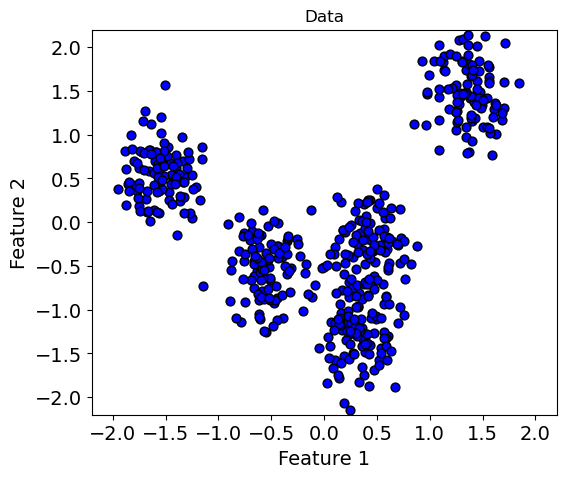

In [4]:
plt.figure(figsize=(6, 5)) # Set the size of the figure
plt.scatter(X[:, 0], X[:, 1], s=40, c='b', edgecolors='k') # Create a scatter plot of the data
plt.xlabel('Feature 1', fontsize=14) # Set the label of the x-axis
plt.ylabel('Feature 2', fontsize=14) # Set the label of the y-axis
plt.xticks(fontsize=14) # Set the font size of the x-axis ticks
plt.yticks(fontsize=14) # Set the font size of the y-axis ticks
plt.xlim(-2.2, 2.2) # Set the limits of the x-axis
plt.ylim(-2.2, 2.2) # Set the limits of the y-axis
plt.title('Data') # Set the title of the plot
plt.show() # Display the plot

## Classification using supervised machine learning algorithms

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Split the data into training and testing sets

In [6]:
# Create a meshgrid
h = 0.02 # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Set the limits of the x-axis
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Set the limits of the y-axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Create a meshgrid

### KNN

Accuracy of K-Nearest Neighbors: 0.96


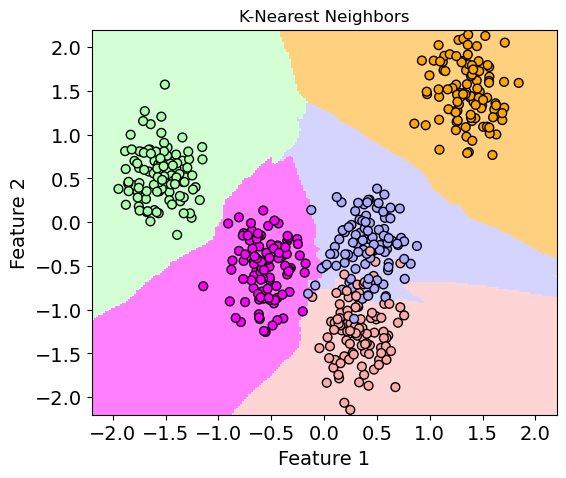

In [7]:
knn = KNeighborsClassifier(n_neighbors=5) # Create a K-Nearest Neighbors classifier
knn.fit(X_train, y_train) # Train the classifier
y_pred = knn.predict(X_test) # Predict the labels of the testing set
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the classifier
print('Accuracy of K-Nearest Neighbors:', accuracy) # Print the accuracy of the classifier

plt.figure(figsize=(6, 5)) # Set the size of the figure
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict the labels of the meshgrid
Z = Z.reshape(xx.shape) # Reshape the labels

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5) # Plot the decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap_light, edgecolors='k') # Create a scatter plot of the data
plt.xlabel('Feature 1', fontsize=14) # Set the label of the x-axis
plt.ylabel('Feature 2', fontsize=14) # Set the label of the y-axis
plt.xticks(fontsize=14) # Set the font size of the x-axis ticks
plt.yticks(fontsize=14) # Set the font size of the y-axis ticks
plt.xlim(-2.2, 2.2) # Set the limits of the x-axis
plt.ylim(-2.2, 2.2) # Set the limits of the y-axis
plt.title('K-Nearest Neighbors') # Set the title of the plot
plt.show() # Display the plot

# DT & RDF

Accuracy of Decision Tree: 0.9533333333333334
Accuracy of Random Forest: 0.96


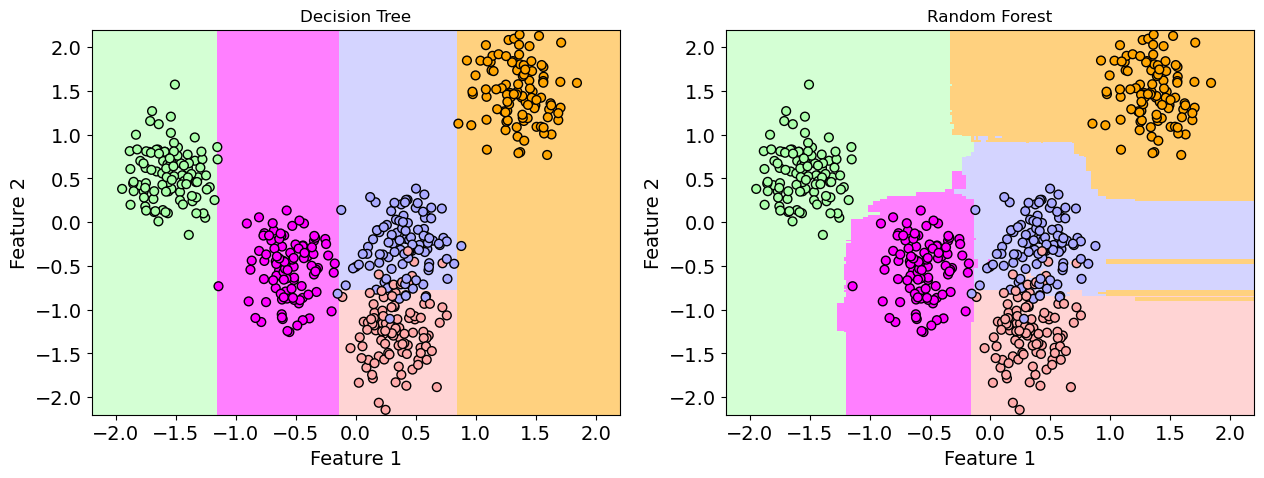

In [8]:
dt = DecisionTreeClassifier(max_depth=5) # Create a Decision Tree classifier
dt.fit(X_train, y_train) # Train the classifier
y_pred = dt.predict(X_test) # Predict the labels of the testing set
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the classifier
print('Accuracy of Decision Tree:', accuracy) # Print the accuracy of the classifier

rdf = RandomForestClassifier(n_estimators=100, random_state=1) # Create a Random Forest classifier
rdf.fit(X_train, y_train) # Train the classifier
y_pred = rdf.predict(X_test) # Predict the labels of the testing set
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the classifier
print('Accuracy of Random Forest:', accuracy) # Print the accuracy of the classifier

plt.figure(figsize=(15, 5)) # Set the size of the figure
plt.subplot(1, 2, 1) # Create a subplot
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict the labels of the meshgrid
Z = Z.reshape(xx.shape) # Reshape the labels

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5) # Plot the decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap_light, edgecolors='k') # Create a scatter plot of the data
plt.xlabel('Feature 1', fontsize=14) # Set the label of the x-axis
plt.ylabel('Feature 2', fontsize=14) # Set the label of the y-axis
plt.xticks(fontsize=14) # Set the font size of the x-axis ticks
plt.yticks(fontsize=14) # Set the font size of the y-axis ticks
plt.xlim(-2.2, 2.2) # Set the limits of the x-axis
plt.ylim(-2.2, 2.2) # Set the limits of the y-axis
plt.title('Decision Tree') # Set the title of the plot

plt.subplot(1, 2, 2) # Create a subplot
Z = rdf.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict the labels of the meshgrid
Z = Z.reshape(xx.shape) # Reshape the labels

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5) # Plot the decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap_light, edgecolors='k') # Create a scatter plot of the data
plt.xlabel('Feature 1', fontsize=14) # Set the label of the x-axis
plt.ylabel('Feature 2', fontsize=14) # Set the label of the y-axis
plt.xticks(fontsize=14) # Set the font size of the x-axis ticks
plt.yticks(fontsize=14) # Set the font size of the y-axis ticks
plt.xlim(-2.2, 2.2) # Set the limits of the x-axis
plt.ylim(-2.2, 2.2) # Set the limits of the y-axis
plt.title('Random Forest') # Set the title of the plot
plt.show() # Display the plot

## SVM

Accuracy of Support Vector Machine: 0.96


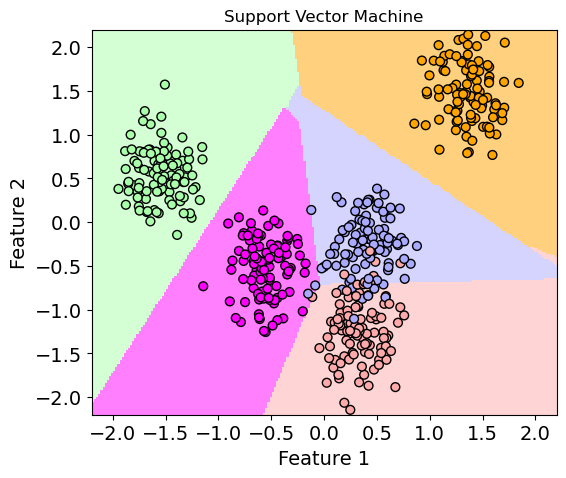

In [9]:
svm = SVC(kernel='linear') # Create a Support Vector Machine classifier
svm.fit(X_train, y_train) # Train the classifier
y_pred = svm.predict(X_test) # Predict the labels of the testing set
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the classifier
print('Accuracy of Support Vector Machine:', accuracy) # Print the accuracy of the classifier

plt.figure(figsize=(6, 5)) # Set the size of the figure
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict the labels of the meshgrid
Z = Z.reshape(xx.shape) # Reshape the labels

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5) # Plot the decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap_light, edgecolors='k') # Create a scatter plot of the data
plt.xlabel('Feature 1', fontsize=14) # Set the label of the x-axis
plt.ylabel('Feature 2', fontsize=14) # Set the label of the y-axis
plt.xticks(fontsize=14) # Set the font size of the x-axis ticks
plt.yticks(fontsize=14) # Set the font size of the y-axis ticks
plt.xlim(-2.2, 2.2) # Set the limits of the x-axis
plt.ylim(-2.2, 2.2) # Set the limits of the y-axis
plt.title('Support Vector Machine') # Set the title of the plot
plt.show() # Display the plot